In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seab~orn as sns
import copy
import os
from utils import df_series_strip

In [2]:
dataPath = "./Data/"
patchDataFile = "NMS_patch_notes_full.xlsx"
patchDF = pd.read_excel(dataPath+patchDataFile,index_col=0)
patchDF.head()

,Title,Date,Notes,Patch update,Bug fix update,Scrape error,Patch page url,Expedition
0,abyss,2018-10-01,'Patch notes'\n'Underwater Gameplay and Visual...,1.0,0.0,0.0,https://www.nomanssky.com//abyss-update/,0.0
1,adrift,2024-05-29,"'Expedition Thirteen: Adrift'\n'May 29, 2024'\...",1.0,0.0,0.0,https://www.nomanssky.com//2024/05/expedition-...,1.0
2,adrift patch 4.71,2024-05-31,"""Adrift Patch 4.71 - No Man's Sky""\n'Menu'\n'L...",0.0,1.0,0.0,https://www.nomanssky.com//2024/05/adrift-4-71/,0.0
3,adrift patch 4.71.1,2024-05-31,"""Adrift Patch 4.71.1 - No Man's Sky""\n'Menu'\n...",0.0,1.0,0.0,https://www.nomanssky.com//2024/05/adrift-4-71-1/,0.0
4,adrift patch 4.72,2024-06-04,"""Adrift Patch 4.72 - No Man's Sky""\n'Menu'\n'L...",0.0,1.0,0.0,https://www.nomanssky.com//2024/06/adrift-4-72/,0.0


In [3]:
reviewDataFile = "SteamAPI_NMS_reviews.xlsx"
reviewDF = pd.read_excel(dataPath+reviewDataFile,index_col=0)
reviewDF.head()

,recommendationid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
0,198664720,0,1,250,172,243.0,1751392649,english,I liked every thing,2025-07-01 17:47:05,2025-07-01 17:47:05,True,0,0,0.5,0,True,False,False,False
1,198664615,0,16,16380,1338,16380.0,1751392203,swedish,Good game,2025-07-01 17:45:39,2025-07-01 17:45:39,True,0,0,0.5,0,True,False,False,False
2,198663932,0,33,14,0,14.0,1672123150,english,No Man in Sky,2025-07-01 17:36:47,2025-07-01 17:36:47,True,0,0,0.5,0,False,False,False,False
3,198663626,0,1,4320,2079,4320.0,1751197679,schinese,NaN,2025-07-01 17:33:09,2025-07-01 17:33:09,True,0,0,0.5,0,False,False,False,False
4,198663578,32,3,1275,1275,1275.0,1751391044,russian,NaN,2025-07-01 17:32:26,2025-07-01 17:32:26,True,0,0,0.5,0,True,False,False,False


In [4]:
patchDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           241 non-null    object        
 1   Date            240 non-null    datetime64[ns]
 2   Notes           235 non-null    object        
 3   Patch update    239 non-null    float64       
 4   Bug fix update  239 non-null    float64       
 5   Scrape error    239 non-null    float64       
 6   Patch page url  239 non-null    object        
 7   Expedition      239 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 16.9+ KB


In [5]:
patchDF = patchDF.sort_values(by=["Date"])
patchDF.head()

,Title,Date,Notes,Patch update,Bug fix update,Scrape error,Patch page url,Expedition
180,pc patch 1.04,2016-08-18,"""PC Patch 1.04 - No Man's Sky""\n'Menu'\n'Lates...",0.0,1.0,0.0,https://www.nomanssky.com//pc-patch-1-04/,0.0
181,pc patch 1.05,2016-08-19,"""PC Patch 1.05 - No Man's Sky""\n'Menu'\n'Lates...",0.0,1.0,0.0,https://www.nomanssky.com//pc-patch-1-05/,0.0
182,pc patch 1.06,2016-08-20,"""PC Patch 1.06 - No Man's Sky""\n'Menu'\n'Lates...",0.0,1.0,0.0,https://www.nomanssky.com//pc-patch-1-06/,0.0
183,pc patch 1.07,2016-09-02,"""PC Patch 1.07 - No Man's Sky""\n'Menu'\n'Lates...",0.0,1.0,0.0,https://www.nomanssky.com//pc-patch-1-07/,0.0
191,ps4 1.04 1.07,2016-09-02,NaN,0.0,1.0,1.0,https://www.nomanssky.com//ps4-1-04-1-07/,0.0


In [6]:
reviewDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355369 entries, 0 to 55184
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   recommendationid             355369 non-null  int64         
 1   num_games_owned              355369 non-null  int64         
 2   num_reviews                  355369 non-null  int64         
 3   playtime_forever             355369 non-null  int64         
 4   playtime_last_two_weeks      355369 non-null  int64         
 5   playtime_at_review           355236 non-null  float64       
 6   last_played                  355369 non-null  int64         
 7   language                     355369 non-null  object        
 8   review                       286978 non-null  object        
 9   timestamp_created            355369 non-null  datetime64[ns]
 10  timestamp_updated            355369 non-null  datetime64[ns]
 11  voted_up                     355

In [7]:
reviewDF["Date"] = reviewDF["timestamp_created"].copy()
reviewDF = reviewDF.drop(columns=["timestamp_created"])
reviewDF = reviewDF.sort_values(by=["Date"])
reviewDF.head()

,recommendationid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,Date
55184,24845391,1058,16,27907,0,256.0,1670666189,russian,NaN,2016-08-12 17:08:41,True,32,29,0.437991,16,True,False,False,False,2016-08-12 17:08:41
55153,24845425,478,7,258,0,122.0,1702944509,english,"yeah m8, this is gr8, no d-b8 i r8 it an 8 i h...",2016-08-12 17:25:48,True,58,325,0.165244,13,False,False,False,False,2016-08-12 17:10:35
34015,24845428,252,14,4545,0,1198.0,1722813284,english,Its pretty good tbhEDIT: Its pretty good but f...,2016-08-17 08:22:48,False,0,0,0.500000,1,True,False,False,False,2016-08-12 17:10:40
54063,24845437,899,14,3660,0,1155.0,1722100093,english,"1ST PUBLIC REVIEW!EDIT: Quick tips, left click...",2016-08-12 18:47:13,True,31,17,0.165018,4,True,False,False,False,2016-08-12 17:11:08
55183,24845456,254,1,569,0,364.0,1723120964,tchinese,cannot play,2016-08-12 17:12:26,True,4,3,0.493138,0,True,False,False,False,2016-08-12 17:12:26


In [8]:
reviewDF[["upvote_perc"]] = 100.0 * (reviewDF[["voted_up"]].expanding(1).sum())/(reviewDF[["voted_up"]].expanding(1).count()) #.iloc[44:48]#[reviewDF["voted_up"]==False]
reviewDF.tail()

,recommendationid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_updated,...,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,Date,upvote_perc
4,198663578,32,3,1275,1275,1275.0,1751391044,russian,NaN,2025-07-01 17:32:26,...,0,0,0.5,0,True,False,False,False,2025-07-01 17:32:26,83.225416
3,198663626,0,1,4320,2079,4320.0,1751197679,schinese,NaN,2025-07-01 17:33:09,...,0,0,0.5,0,False,False,False,False,2025-07-01 17:33:09,83.225463
2,198663932,0,33,14,0,14.0,1672123150,english,No Man in Sky,2025-07-01 17:36:47,...,0,0,0.5,0,False,False,False,False,2025-07-01 17:36:47,83.225511
1,198664615,0,16,16380,1338,16380.0,1751392203,swedish,Good game,2025-07-01 17:45:39,...,0,0,0.5,0,True,False,False,False,2025-07-01 17:45:39,83.225558
0,198664720,0,1,250,172,243.0,1751392649,english,I liked every thing,2025-07-01 17:47:05,...,0,0,0.5,0,True,False,False,False,2025-07-01 17:47:05,83.225605


### Align end dates of each dataframe

In [9]:
reviewDF = reviewDF.loc[reviewDF["Date"]<=patchDF["Date"].max()]

### Plot raw trend of steam reviews versus time overlaid with major patch release dates

In [10]:
plotSavePath = "./Figures/"

tmp = ""
for savePathChunk in plotSavePath.split("/")[:-1]:
    tmp += savePathChunk + "/"
    try:
        os.mkdir(tmp)
    except:
        pass

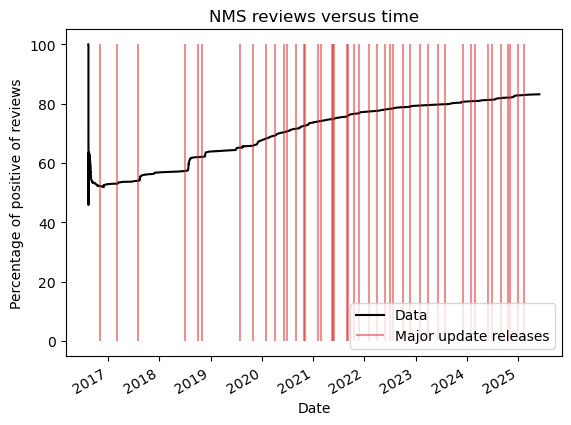

In [11]:
fig, ax = plt.subplots()

reviewDF.plot(x="Date",y="upvote_perc",title="NMS reviews versus time",ax=ax,color="black",label="Data")
# ax.vlines(patchDF["Date"],0,1,color=[("tab:red",0.5) if patch else ("tab:blue",0.5) for patch in patchDF["Patch update"]])
ax.vlines(patchDF["Date"].loc[patchDF["Patch update"]==True],0,100,color=("tab:red",0.5),label="Major update releases")
ax.set_ylabel("Percentage of positive of reviews")
plt.legend(loc="lower right")

saveFile = "NMS-review-score-vs-time_major-releases.jpg"
plt.savefig(plotSavePath+saveFile)
plt.show()


### Now with minor bug fix releases also included

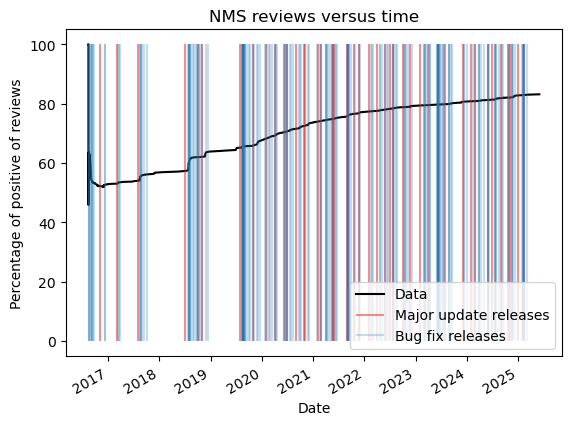

In [12]:
fig, ax = plt.subplots()
reviewDF.plot(x="Date",y="upvote_perc",title="NMS reviews versus time",ax=ax,color="black",label="Data")
ax.vlines(patchDF["Date"].loc[patchDF["Patch update"]==True],0,100,color=("tab:red",0.5),label="Major update releases")
ax.vlines(patchDF["Date"].loc[patchDF["Patch update"]==False],0,100,color=("tab:blue",0.25),label="Bug fix releases")
# ax.vlines(patchDF["Date"].loc[patchDF["Patch update"]==True],0,1,color=("tab:red",0.5))
ax.set_ylabel("Percentage of positive of reviews")
plt.legend(loc="lower right")

saveFile = "NMS-review-score-vs-time_all-releases.jpg"
plt.savefig(plotSavePath+saveFile)
plt.show()

### Assess correlation between columns in review data as is (i.e. without introducing any additional data about updates)

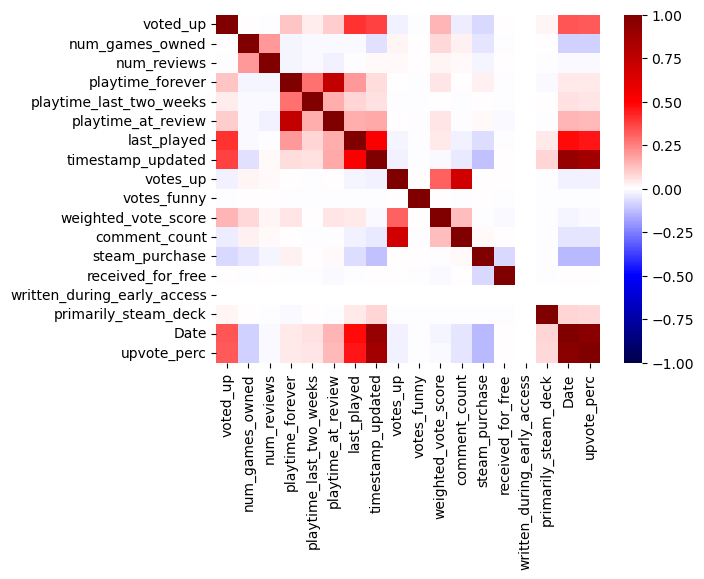

In [58]:
reviewDFnumeric = reviewDF.select_dtypes(exclude=["object"])
reviewDFnumeric = reviewDFnumeric.drop(columns=["recommendationid"])
reviewDFnumeric = reviewDFnumeric.reindex(columns=["voted_up"]+[col for col in reviewDFnumeric.columns if col != "voted_up"])
reviewCorr = reviewDFnumeric.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(reviewCorr, xticklabels=reviewCorr.columns, yticklabels=reviewCorr.columns,vmin=-1.0,vmax=1.0,cmap="seismic",ax=ax)#, annot=True)
plt.subplots_adjust(left=0.3,bottom=0.3)
saveFile = "NMS-review-data-cross-correlation-matrix-heatmap.jpg"
plt.savefig(plotSavePath+saveFile)
plt.show()


#### Notes

Focussing on our target variable of interest "upvote_perc", there appears to be a positive correlation between upvote percentage and timestamp of review. This probably reflects the influence of increasingly favourable reviews with time, as well as the small number statistics at the earliest dates in our dataset immediately following the game's release. We may need to account for this latter effect, possibly by using methods which decrease the weighted influence of older reviews.

On an individual basis (which, is the main insight we can derive from this non-aggregated, near to being completely raw, dataset) we can see correlation between a favourable review on an individual level also correlates with date of the review. This may be due to the aforementioned influence of increasing percentage of favourable reviews with time, influence of large (low) number statistics at present-day (older) dates, and an increase in player numbers as the upvote percentage increases and new players decide to try the game as a result. Playtime at review and playtime forever also show positive correlation with upvote percentage, showing gamers who review it favourably are likely to played it longer before reviewing it, and to play it more overall (before and after the review) - which is to be expected. 

Social commentary won't be made on the low negative correlation between an upvote review and the number of upvotes that review itself recieves ;.)

Players who purchased the game through Steam are less likely to leave a favourable review, but care needs to be taken when interpretting this aspect of the data as their is inherent bias introduced on this measure by the fact that the reviews have solely been sourced from Steam.

### Explore word frequency in patch notes

In [28]:
patchNotes = (patchDF[["Notes"]].copy())
patchNotes = patchNotes.dropna()

In [39]:
tmp = df_series_strip(patchNotes,target={"Notes":r"[^a-zA-Z ]+"},replacement=r" ",compare=True)

Before vs after
180    "PC Patch 1.04 - No Man's Sky"\n'Menu'\n'Lates...
181    "PC Patch 1.05 - No Man's Sky"\n'Menu'\n'Lates...
182    "PC Patch 1.06 - No Man's Sky"\n'Menu'\n'Lates...
183    "PC Patch 1.07 - No Man's Sky"\n'Menu'\n'Lates...
184    "PC Patch 1.08 - No Man's Sky"\n'Menu'\n'Lates...
Name: Notes, dtype: object
180     PC Patch     No Man s Sky Menu Latest patch n...
181     PC Patch     No Man s Sky Menu Latest patch n...
182     PC Patch     No Man s Sky Menu Latest patch n...
183     PC Patch     No Man s Sky Menu Latest patch n...
184     PC Patch     No Man s Sky Menu Latest patch n...
Name: Notes, dtype: object




In [60]:
words = [word.lower() for note in tmp["Notes"].to_numpy() for word in note.strip().split(" ") if (word!="")&(word not in ["and", "the", "it","of","man"])&(len(word)>1)]
uniqueWords, wordCount = np.unique(words,return_counts=True)

In [63]:
index = np.argsort(wordCount)
wordCount = wordCount[index]
uniqueWords = uniqueWords[index]

In [70]:
nMostFrequentWords = 200
print(uniqueWords[-1*nMostFrequentWords::])
print(wordCount[-1*nMostFrequentWords::])

['them' 'up' 'objects' 'drops' 'had' 'display' 'also' 'may' 'cloud'
 'settlement' 'cross' 'fail' 'rewards' 'audio' 'creature' 'buy' 'who'
 'twitch' 'centre' 'beyond' 'coming' 'one' 'become' 'water' 'very' 'made'
 'end' 'help' 'loading' 'creatures' 'log' 'incorrectly' 'options' 'multi'
 'community' 'into' 'planets' 'screen' 'increased' 'part' 'about'
 'freighters' 'sentinel' 'included' 'xbox' 'planet' 'ps' 'technology'
 'effects' 'items' 'large' 'galactic' 'during' 'fix' 'available' 'station'
 'incorrect' 'exocraft' 'planetary' 'possible' 'introduced' 'notes'
 'using' 'atlas' 'building' 'steam' 'news' 'ships' 'out' 'bases'
 'multiplayer' 'terrain' 'rendering' 'closely' 'mode' 'soon' 'listening'
 'ui' 'text' 'specific' 'were' 'appear' 'system' 'parts' 'zendesk'
 'patches' 'anomaly' 'vr' 'was' 'pc' 'live' 'correctly' 'inventory'
 'encounter' 'feedback' 'starship' 'submitting' 'especially' 'console'
 'occur' 'platforms' 'prevent' 'memory' 'reporting' 'let' 'taking' 'would'
 'update' 'man' 

In [69]:
minFreqThreshold = 100
whereAboveThresh = np.where(wordCount>=minFreqThreshold)
print(uniqueWords[whereAboveThresh])
print(wordCount[whereAboveThresh])

['travellers' 'person' 'polo' 'navigation' 'it' 'able' 'again' 'well'
 'non' 'corrupted' 'teleporter' 'target' 'journey' 'weapons'
 'occasionally' 'make' 'hud' 'own' 'displayed' 'icons' 'its' 'correct'
 'catalogue' 'customisation' 'see' 'allowing' 'stuck' 'pirate'
 'significant' 'various' 'derelict' 'exosuit' 'full' 'high' 'current'
 'without' 'interactions' 'power' 'removed' 'significantly' 'class'
 'information' 'spawn' 'august' 'upgrades' 'milestone' 'icon' 'load'
 'analysis' 'effect' 'portal' 'stations' 'much' 'over' 'warping'
 'snapping' 'interaction' 'already' 'many' 'another' 'used' 'range'
 'frigates' 'across' 'optimisation' 'warp' 'including' 'same' 'causing'
 'visor' 'appearance' 'missing' 'next' 'working' 'released' 'small'
 'generation' 'switch' 'build' 'markers' 'quality' 'around' 'only'
 'settings' 'landing' 'discovery' 'crashes' 'reduced' 'companion' 'placed'
 'data' 'slots' 'today' 'support' 'collision' 'between' 'damage'
 'starships' 'performance' 'option' 'but' 'use' 

### Explore word frequency in "Patch update" only notes

In [71]:
patchNotes = ((patchDF.loc[patchDF["Patch update"] == True])[["Notes"]].copy())
patchNotes = patchNotes.dropna()

In [72]:
tmp = df_series_strip(patchNotes,target={"Notes":r"[^a-zA-Z ]+"},replacement=r" ",compare=True)

Before vs after
103    'Patch notes'\n'General Gameplay'\n'Fixed tech...
179    'Patch Notes'\n'Audio'\n'50% more generative s...
8      'Patch notes'\n'Generation'\n'Increased variet...
140    'Patch notes'\n'Third Person'\n'Third person c...
0      'Patch notes'\n'Underwater Gameplay and Visual...
Name: Notes, dtype: object
103     Patch notes General Gameplay Fixed technology...
179     Patch Notes Audio  more generative soundscape...
8       Patch notes Generation Increased variety in w...
140     Patch notes Third Person Third person camera ...
0       Patch notes Underwater Gameplay and Visuals I...
Name: Notes, dtype: object




In [73]:
words = [word.lower() for note in tmp["Notes"].to_numpy() for word in note.strip().split(" ") if (word!="")&(word not in ["and", "the", "it","of","man"])&(len(word)>1)]
uniqueWords, wordCount = np.unique(words,return_counts=True)

In [74]:
index = np.argsort(wordCount)
wordCount = wordCount[index]
uniqueWords = uniqueWords[index]

In [75]:
nMostFrequentWords = 200
print(uniqueWords[-1*nMostFrequentWords::])
print(wordCount[-1*nMostFrequentWords::])

['journey' 'well' 'customisation' 'discovery' 'visor' 'expeditions' 'map'
 'underwater' 'but' 'quicksilver' 'found' 'very' 'allow' 'buildings'
 'optimisations' 'catalogue' 'had' 'item' 'generated' 'generation' 'were'
 'notes' 'between' 'reduced' 'various' 'research' 'over' 'would'
 'including' 'through' 'aboard' 'also' 'longer' 'target' 'unique'
 'universe' 'improvements' 'made' 'audio' 'within' 'display' 'quick'
 'than' 'worlds' 'first' 'starships' 'patch' 'travellers' 'nexus' 'used'
 'who' 'incorrect' 'so' 'one' 'screen' 'part' 'our' 'galaxy' 'allowing'
 'significant' 'its' 'damage' 'tool' 'camera' 'own' 'quality' 'companion'
 'community' 'page' 'prevent' 'freighters' 'out' 'any' 'occur' 'update'
 'memory' 'such' 'them' 'specific' 'multiplayer' 'correctly' 'creature'
 'large' 'range' 'systems' 'water' 'use' 'across' 'during' 'bases' 'was'
 'significantly' 'which' 'up' 'appear' 'objects' 'rendering' 'using'
 'exocraft' 'man' 'text' 'multi' 'crash' 'save' 'into' 'combat' 'items'
 'stat

In [77]:
minFreqThreshold = 75
whereAboveThresh = np.where(wordCount>=minFreqThreshold)
print(uniqueWords[whereAboveThresh])
print(wordCount[whereAboveThresh])

['part' 'our' 'galaxy' 'allowing' 'significant' 'its' 'damage' 'tool'
 'camera' 'own' 'quality' 'companion' 'community' 'page' 'prevent'
 'freighters' 'out' 'any' 'occur' 'update' 'memory' 'such' 'them'
 'specific' 'multiplayer' 'correctly' 'creature' 'large' 'range' 'systems'
 'water' 'use' 'across' 'during' 'bases' 'was' 'significantly' 'which'
 'up' 'appear' 'objects' 'rendering' 'using' 'exocraft' 'man' 'text'
 'multi' 'crash' 'save' 'into' 'combat' 'items' 'station' 'rewards'
 'options' 'introduced' 'time' 'menu' 'you' 'planet' 'creatures' 'related'
 'after' 'ships' 'ui' 'not' 'may' 'sky' 'vr' 'prevented' 'sentinel'
 'planets' 'available' 'mode' 'being' 'these' 'other' 'technology'
 'anomaly' 'inventory' 'they' 'terrain' 'building' 'increased' 'system'
 'effects' 'game' 'where' 'parts' 'rare' 'if' 'planetary' 'visual'
 'missions' 'we' 'starship' 'by' 'while' 'this' 'some' 'ship' 'no' 'your'
 'all' 'issues' 'freighter' 'mission' 'at' 'player' 'expedition' 'more'
 'or' 'will' 'is' '

### First attempts at trying to tag keywords or phrases 

In [78]:
patchNotes = ((patchDF.loc[patchDF["Patch update"] == True])[["Notes"]].copy())

In [83]:
searchTerms = ["freighter"]
patchNotes["Notes"] = patchNotes["Notes"].str.lower()
print(patchNotes.shape)
print((patchNotes.loc[patchNotes["Notes"].str.contains(r"freighter[s]{0,}",na=False)]).shape)

(46, 1)
(36, 1)
